<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum_11/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

In [ ]:
X = df.drop(["Species", "SpeciesEncoded"], axis=1)

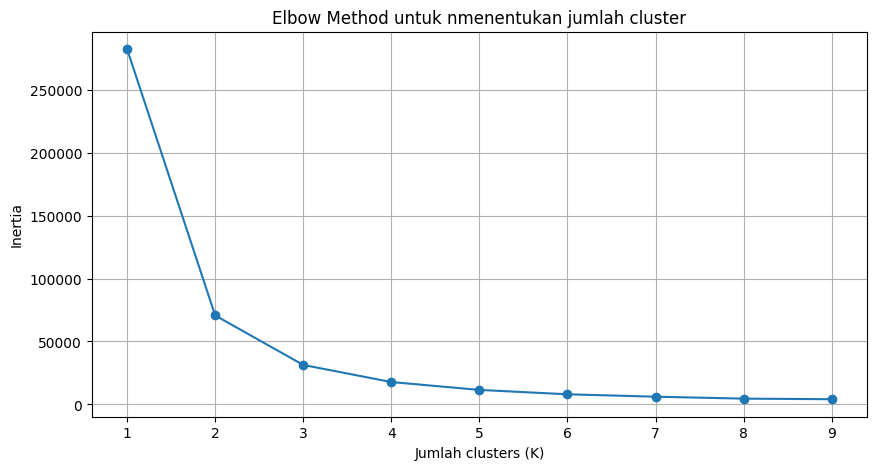

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
K_range = range(1, 10)

for k in K_range:
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia_list.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, inertia_list, marker='o')
plt.title('Elbow Method untuk nmenentukan jumlah cluster')
plt.xlabel('Jumlah clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(
    n_clusters=3,
    init="k-means++",
    random_state=42
)

In [ ]:
df["Cluster"] = kmeans.fit_predict(X)
print("Cluster ditemukan:", df["Cluster"].unique())

Cluster ditemukan: [2 0 1]


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, df["Cluster"])
print("\n Silhoutte score:", sil_score)



 Silhoutte score: 0.5818419752523231


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("\n Confussion matriks")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


 Confussion matriks
[[ 1  0 49]
 [49  1  0]
 [ 0 50  0]]


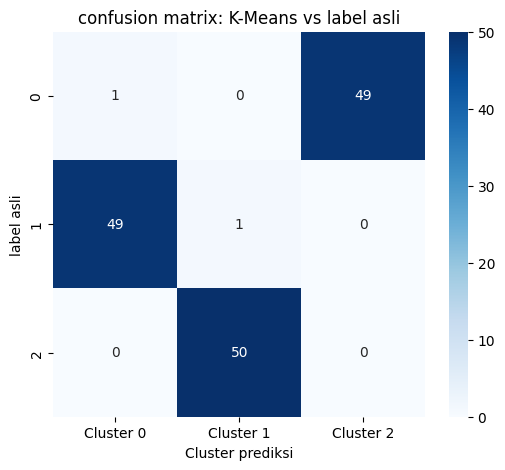

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap= 'Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels= le.classes_
)
plt.title("confusion matrix: K-Means vs label asli")
plt.xlabel('Cluster prediksi')
plt.ylabel('label asli')
plt.show()

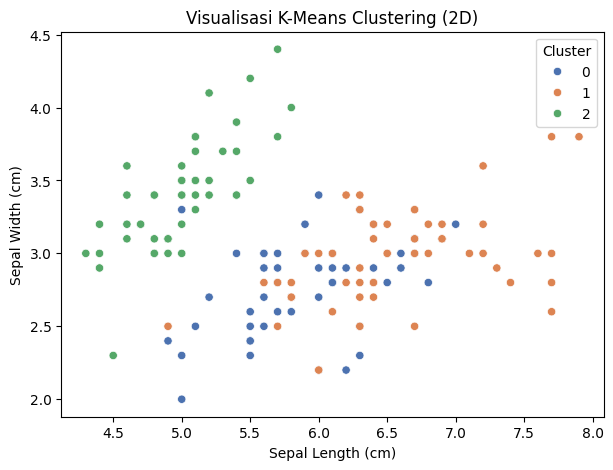

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)

plt.title("Visualisasi K-Means Clustering (2D)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

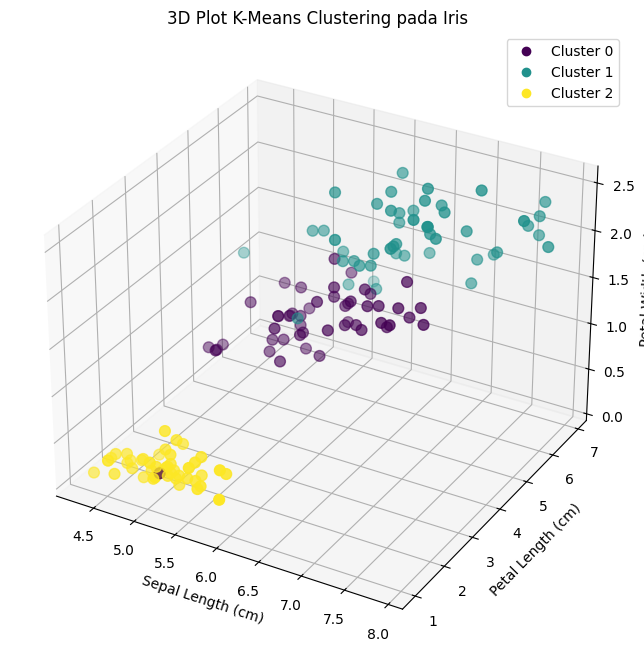

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['SepalLengthCm'],
    df['PetalLengthCm'],
    df['PetalWidthCm'],
    c=df['Cluster'],
    s=60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Menambahkan legenda (Legend)
legend_labels = [f"Cluster {i}" for i in range(df['Cluster'].nunique())]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()